In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import time
from load_data_and_distribution_analisys import split_dataset_v1, plot_confusion_matrix, normalize_data, load_dataset_cleaned

# Altri classificatori testati

In questo notebook verranno riportati i risultati ottenuti dall'utilizzo di modelli differenti dalla Random Forest; vengono riportati tutti quanti assieme in questo notebook per una questione di risultati meno convincenti rispetto all'utilizzo di una Random Forest (la motivazione e tutti i dettagli sono presenti nel report del progetto).    
Per non appesantire troppo il notebook, non sono state riportate le fasi di selezione dei migliori iperparametri per ogni modello e il procedimento della feature selection: facendo vari test ci siamo accorti che i risultati non cambiavano molto, però abbiamo comunque fatto una ricerca esaustiva per quanto riguarda la selezione degli iperparametri più adatti al nostro tipo di dataset.  
I modelli allenati e testati in questo notebook sono:
- KNN
- AdaBoost
- Support Vector Machine (kernel lineare)

In [3]:
dataset = load_dataset_cleaned()

Path to dataset files: /Users/marcodeano/.cache/kagglehub/datasets/sooyoungher/smoking-drinking-dataset/versions/2
   sex  age  height  weight  ...  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN
0    1   35     170      75  ...      35.0       40.0               1.0       1
1    1   30     180      80  ...      36.0       27.0               3.0       0
2    1   40     165      75  ...      32.0       68.0               1.0       0
3    1   50     175      80  ...      34.0       18.0               1.0       0
4    1   50     165      60  ...      12.0       25.0               1.0       0

[5 rows x 24 columns]


In [4]:
X_smoke, y_smoke, X_drink, y_drink = split_dataset_v1(dataset)

In [21]:
pipelines = {
    "adaboost": Pipeline([("scaler", StandardScaler()), ("adaboost", AdaBoostClassifier(n_estimators=200, random_state=42))]),
    "svm": Pipeline([("scaler", StandardScaler()), ("svm", LinearSVC(random_state=42, C=0.1, class_weight="balanced"))]),
    "knn": Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=500, n_jobs=-1))]),
}

In [22]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drink, y_drink, test_size=0.2, random_state=42, stratify=y_drink)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smoke, y_smoke, test_size=0.2, random_state=42, stratify=y_smoke)

### Drinking

In [23]:
for name, pipeline in pipelines.items():
    print(f"Training {name}...", end=" ")
    t0 = time.time()

    pipeline.fit(X_train_d, y_train_d)  
    
    print(f"took {time.time() - t0:.2f} seconds")

Training adaboost... 

/Users/marcodeano/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


took 93.33 seconds
Training svm... took 1.79 seconds
Training knn... took 0.12 seconds


Classification report per adaboost:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73     98396
           1       0.73      0.73      0.73     98619

    accuracy                           0.73    197015
   macro avg       0.73      0.73      0.73    197015
weighted avg       0.73      0.73      0.73    197015



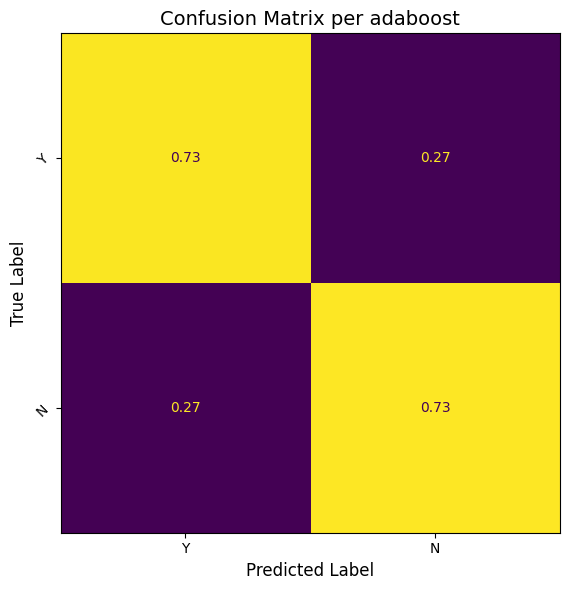

Classification report per svm:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     98396
           1       0.72      0.72      0.72     98619

    accuracy                           0.72    197015
   macro avg       0.72      0.72      0.72    197015
weighted avg       0.72      0.72      0.72    197015



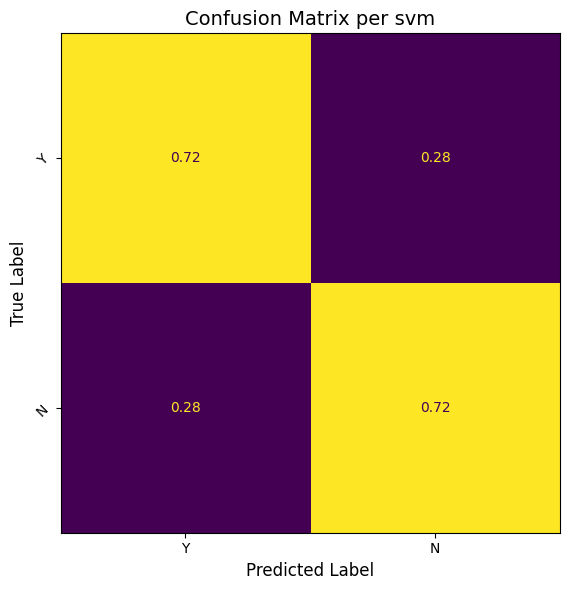

Classification report per knn:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70     98396
           1       0.70      0.76      0.73     98619

    accuracy                           0.71    197015
   macro avg       0.72      0.71      0.71    197015
weighted avg       0.72      0.71      0.71    197015



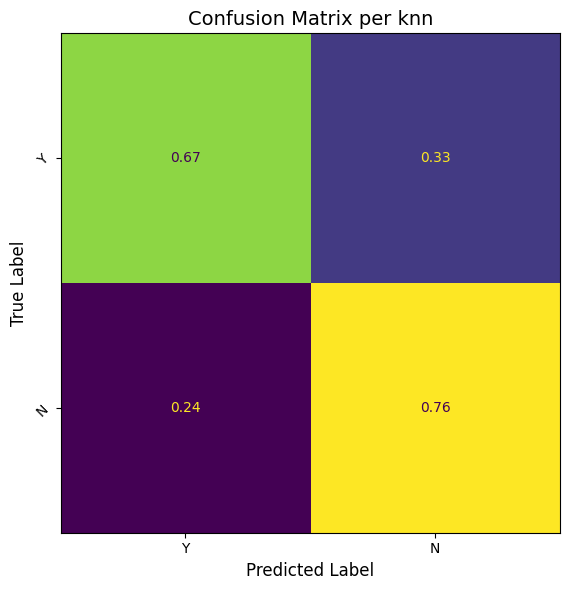

In [24]:
for name, pipeline in pipelines.items():
    y_pred_drink = pipeline.predict(X_test_d)

    report_drink = classification_report(y_test_d, y_pred_drink)

    print(f"Classification report per {name}:")
    print(report_drink)

    plot_confusion_matrix(y_test_d, y_pred_drink, ["Y", "N"], f"Confusion Matrix per {name}")

### Smoking

In [25]:
for name, pipeline in pipelines.items():
    print(f"Training {name}...", end=" ")
    t0 = time.time()

    pipeline.fit(X_train_s, y_train_s)  
    
    print(f"took {time.time() - t0:.2f} seconds")

Training adaboost... 

/Users/marcodeano/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


took 95.32 seconds
Training svm... took 9.20 seconds
Training knn... took 0.15 seconds


Classification report per adaboost:
              precision    recall  f1-score   support

         1.0       0.83      0.83      0.83    119747
         2.0       0.45      0.32      0.37     34738
         3.0       0.50      0.63      0.56     42530

    accuracy                           0.70    197015
   macro avg       0.59      0.59      0.59    197015
weighted avg       0.69      0.70      0.69    197015



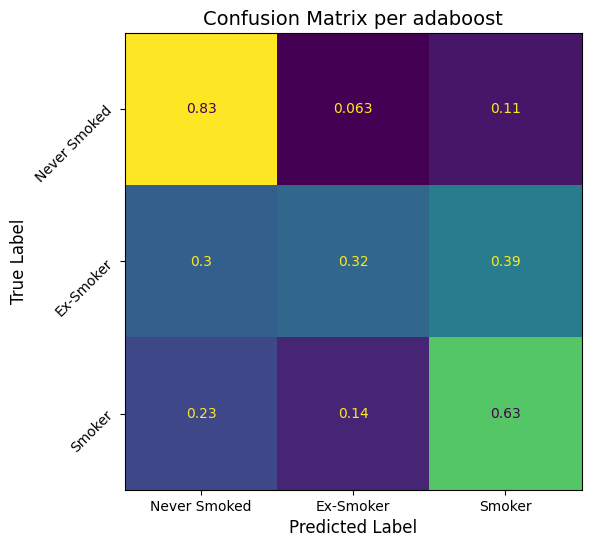

Classification report per svm:
              precision    recall  f1-score   support

         1.0       0.94      0.73      0.82    119747
         2.0       0.41      0.55      0.47     34738
         3.0       0.47      0.65      0.55     42530

    accuracy                           0.68    197015
   macro avg       0.61      0.64      0.61    197015
weighted avg       0.75      0.68      0.70    197015



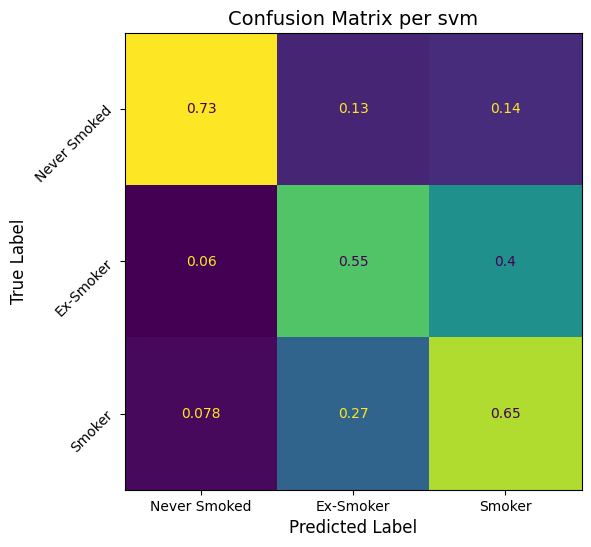

Classification report per knn:
              precision    recall  f1-score   support

         1.0       0.85      0.80      0.83    119747
         2.0       0.44      0.43      0.43     34738
         3.0       0.49      0.59      0.54     42530

    accuracy                           0.69    197015
   macro avg       0.60      0.61      0.60    197015
weighted avg       0.70      0.69      0.70    197015



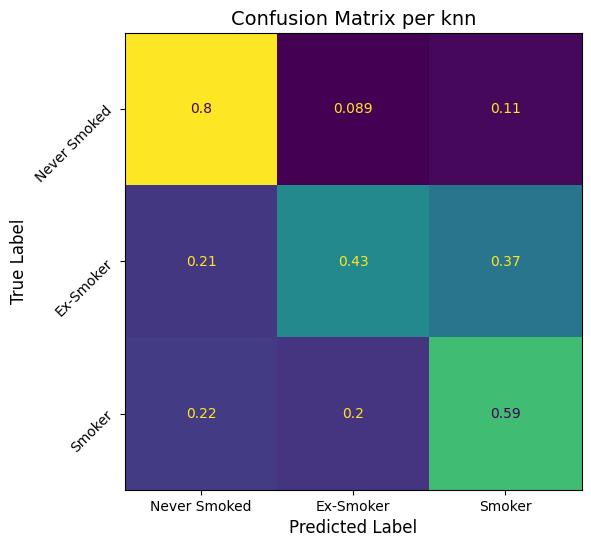

In [26]:
for name, pipeline in pipelines.items():
    y_pred_smoke = pipeline.predict(X_test_s)

    report_smoke = classification_report(y_test_s, y_pred_smoke)

    print(f"Classification report per {name}:")
    print(report_smoke)

    plot_confusion_matrix(y_test_s, y_pred_smoke, ["Never Smoked", "Ex-Smoker", "Smoker"], f"Confusion Matrix per {name}")